### __Smooth numbers__

__k-smooth number__:
An integer whose largest prime factor is $<=$ __k__

<br>

Let's do some prime factorization: <br>
$30 = 5*2*3$

<br>

__The largest__ prime factor of __30__ is __5__ and this means that __30__ is __5-smooth number__ . But also __30__ is __7-smooth number__ ; __11-smooth number__; __13-smooth number__ etc.


In [129]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math

In [4]:
# How to identify the largest prime factor for numbers between 2 and 10000
def is_prime_number(number):
    max_test_num = int(np.ceil(number/2))
    divider = 2
    while number % divider != 0 and divider < max_test_num:
        divider +=1
    if number % divider == 0 and number != 2:
        return False
    else:
        return True

primes = []

for number in range(2, 10000):
    if is_prime_number(number):
        primes.append(number)

In [66]:
def largest_prime_factor(number, prime_numbers):
    if number in prime_numbers:
        return number
    max_test_num = int(np.ceil(number/2))
    prime_numbers = [el for el in prime_numbers if el <= max_test_num]
    
    prime_dividers = []
    for prime_divider in prime_numbers:
        if number % prime_divider == 0 and prime_divider <= max_test_num :
            prime_dividers.append(prime_divider)
            number = number / prime_divider
    return max(prime_dividers)

[   2    3    2 ... 4999  101    5]


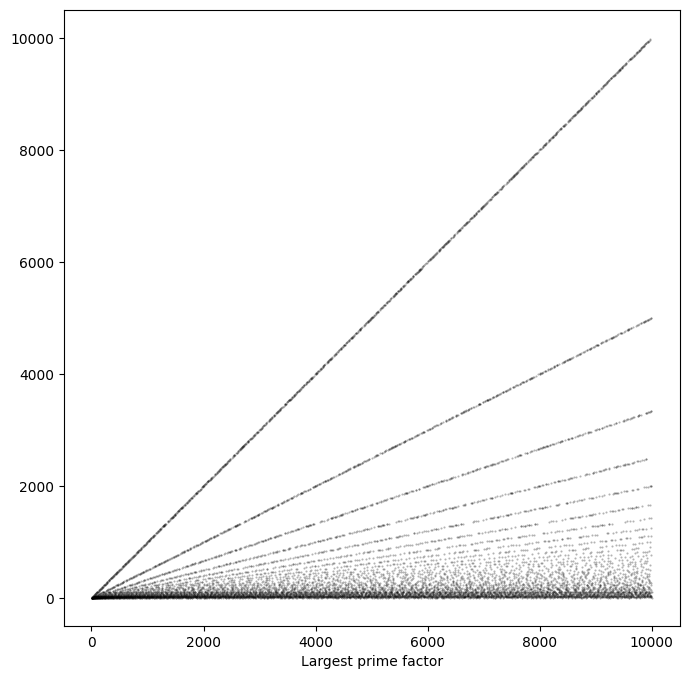

In [97]:
nums = np.arange(2, 10001)
largest_prime_factors = np.array([largest_prime_factor(el, primes) for el in nums])
print(largest_prime_factors)
plt.plot(nums, largest_prime_factors, 'ko', markersize=.5, alpha=0.3)
plt.gcf().set_size_inches(10, 8)
plt.axis('square')
plt.xlabel('Number')
plt.xlabel('Largest prime factor')
plt.show()

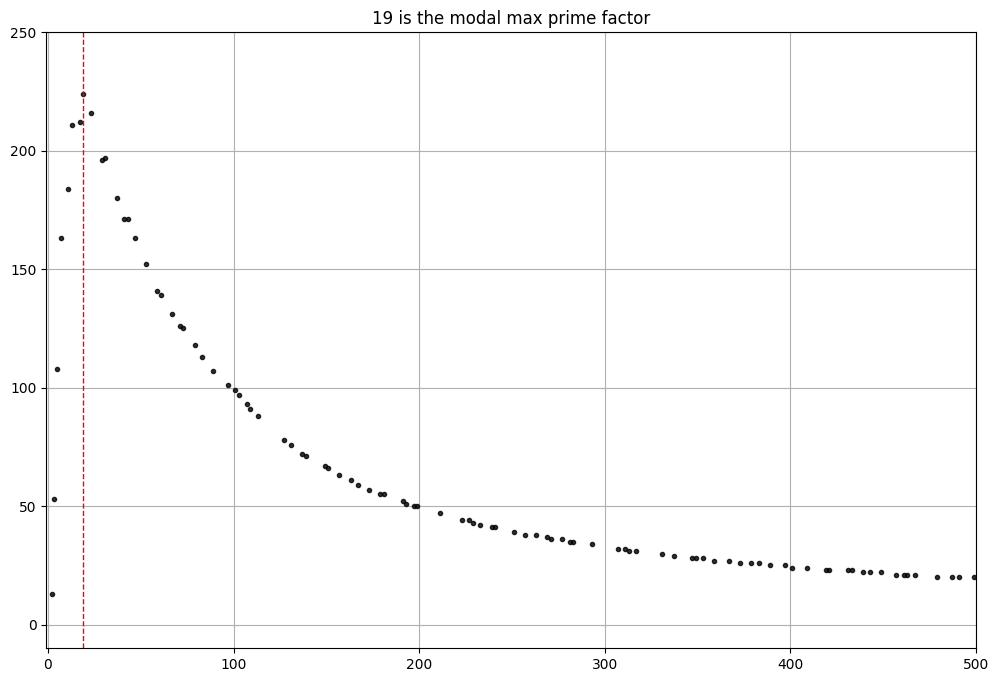

In [126]:
unique_prime_factors = np.unique(largest_prime_factors)
# print(unique_prime_factors)

  
counter = [np.sum(largest_prime_factors==el) for el in unique_prime_factors]
most_freq_idx = np.argmax(counter)
most_freq_y = counter[most_freq_idx]
most_freq_x = unique_prime_factors[most_freq_idx]

plt.plot(unique_prime_factors, counter,  'k.', alpha=0.8)
plt.plot([most_freq_x, most_freq_x], [-10, 250], 'r--', linewidth=1)

plt.title('%s is the modal max prime factor' % most_freq_x)
plt.xlim([-1, 500])
plt.ylim([-10, 250])
plt.grid()
plt.gcf().set_size_inches(12, 8)
plt.show()

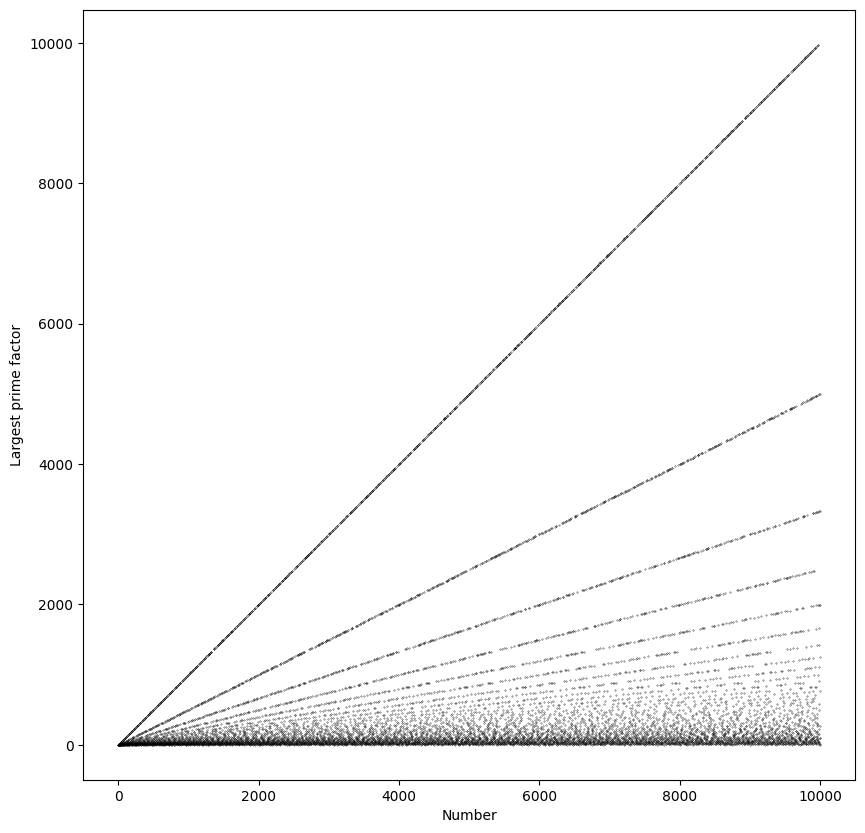

In [104]:
maximum_number = 10000
numbers = np.arange(2, maximum_number+1)

largest_prime_fact = np.zeros(len(numbers), dtype=int)

for num_idx, num in enumerate(numbers):
    largest_prime_fact[num_idx] = np.max(sym.primefactors(num))  

plt.plot(largest_prime_fact, 'k.', markersize=.5)
plt.xlabel('Number')
plt.ylabel('Largest prime factor')
plt.gcf().set_size_inches(10,10)
plt.gca().set_aspect('equal')
plt.show()

### __Exercise__

In [156]:
# all 5-smooth numbers

maximum_number = 10000
numbers = np.arange(2, maximum_number+1)

largest_prime_fact = np.zeros(len(numbers), dtype=int)

for num_idx, num in enumerate(numbers):
    largest_prime_fact[num_idx] = np.max(sym.primefactors(num))

def get_k_smooth_numbers(k, max_num=10000, do_print=True):
    numbers = np.arange(2, max_num+1)
    
    k_smooth = []
    for num_idx, num in enumerate(numbers):
        largest_prime_factor = np.max(sym.primefactors(num))
        if  largest_prime_factor <= k:
            k_smooth.append(num)
    
    if do_print:
        print(f'There are {len(k_smooth)} "{k}-smooth" numbers up to {max_num}:')
        print(np.array(k_smooth))

    return np.array(k_smooth)

a = get_k_smooth_numbers(2)

There are 13 "2-smooth" numbers up to 10000:
[   2    4    8   16   32   64  128  256  512 1024 2048 4096 8192]


In [159]:
len(unique_prime_factors)

1229

In [164]:
smooth_number_freq = np.zeros(len(unique_prime_factors))

for prime_num_idx, prime_num in enumerate(unique_prime_factors):
    smooth_number_freq[prime_num_idx] = len(get_k_smooth_numbers(prime_num, max_num=10000, do_print=False))
    print(f'Smooth number for {prime_num}: {smooth_number_freq[prime_num_idx]} ')
    

Smooth number for 2: 13.0 
Smooth number for 3: 66.0 
Smooth number for 5: 174.0 
Smooth number for 7: 337.0 
Smooth number for 11: 521.0 
Smooth number for 13: 732.0 
Smooth number for 17: 944.0 
Smooth number for 19: 1168.0 
Smooth number for 23: 1384.0 
Smooth number for 29: 1580.0 
Smooth number for 31: 1777.0 
Smooth number for 37: 1957.0 
Smooth number for 41: 2128.0 
Smooth number for 43: 2299.0 
Smooth number for 47: 2462.0 
Smooth number for 53: 2614.0 
Smooth number for 59: 2755.0 
Smooth number for 61: 2894.0 
Smooth number for 67: 3025.0 
Smooth number for 71: 3151.0 
Smooth number for 73: 3276.0 
Smooth number for 79: 3394.0 
Smooth number for 83: 3507.0 
Smooth number for 89: 3614.0 
Smooth number for 97: 3715.0 
Smooth number for 101: 3814.0 
Smooth number for 103: 3911.0 
Smooth number for 107: 4004.0 
Smooth number for 109: 4095.0 
Smooth number for 113: 4183.0 
Smooth number for 127: 4261.0 
Smooth number for 131: 4337.0 
Smooth number for 137: 4409.0 
Smooth number f

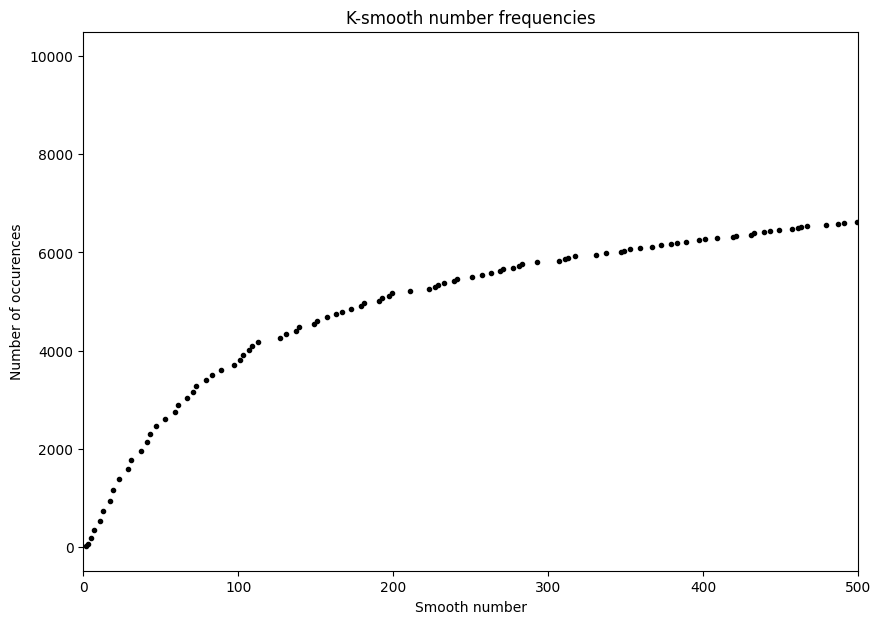

In [172]:
plt.plot(unique_prime_factors, smooth_number_freq, 'k.')

plt.xlim([0, 500])
plt.title('K-smooth number frequencies')
plt.ylabel('Number of occurences')
plt.xlabel('Smooth number')
plt.gcf().set_size_inches(10, 7)
plt.show()